In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
csv_akam = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/AKAM_Stock.csv"
df_akam = pd.read_csv(csv_akam, thousands=',')

In [3]:
df_akam.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,AKAM,71.089996,71.089996,71.489998,69.739998,70.059998,1633700
1,3/4/2019,AKAM,70.290001,70.290001,71.790001,69.709999,71.550003,995000
2,3/5/2019,AKAM,70.550003,70.550003,70.989998,69.800003,70.209999,1282100
3,3/6/2019,AKAM,71.540001,71.540001,71.680000,70.510002,70.620003,1658400
4,3/7/2019,AKAM,70.470001,70.470001,71.150002,70.019997,71.089996,1353400


In [4]:
df_akam.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1.324000e+03
mean,98.894456,98.894456,99.920030,97.838044,98.871488,1.582324e+06
std,13.155544,13.155544,13.238076,13.092423,13.186564,9.565868e+05
min,69.120003,69.120003,69.260002,67.279999,68.230003,2.774000e+05
25%,88.715000,88.715000,89.742500,87.667500,88.660004,1.043800e+06
50%,100.404999,100.404999,101.779999,99.184998,100.419998,1.350500e+06
75%,110.002501,110.002501,111.330000,108.862501,109.972502,1.799050e+06
max,128.320007,128.320007,129.169998,126.980003,128.550003,1.077170e+07


In [5]:
df_akam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1324 non-null   object 
 1   Symbol     1324 non-null   object 
 2   Adj Close  1324 non-null   float64
 3   Close      1324 non-null   float64
 4   High       1324 non-null   float64
 5   Low        1324 non-null   float64
 6   Open       1324 non-null   float64
 7   Volume     1324 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 82.9+ KB


In [6]:
# Convert object to datetime64
df_akam['Date'] = df_akam['Date'].apply(pd.to_datetime)
# Sort data by date time value
df_akam = df_akam.sort_values(by="Date").reset_index(drop=True)
df_akam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1324 non-null   datetime64[ns]
 1   Symbol     1324 non-null   object        
 2   Adj Close  1324 non-null   float64       
 3   Close      1324 non-null   float64       
 4   High       1324 non-null   float64       
 5   Low        1324 non-null   float64       
 6   Open       1324 non-null   float64       
 7   Volume     1324 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 82.9+ KB


In [7]:
df_akam.Close

0       71.089996
1       70.290001
2       70.550003
3       71.540001
4       70.470001
          ...    
1319    92.589996
1320    90.839996
1321    90.220001
1322    92.239998
1323    90.900002
Name: Close, Length: 1324, dtype: float64

In [8]:
df_akam['Prev_close'] = df_akam.shift(1)['Close']
df_akam.Prev_close

0             NaN
1       71.089996
2       70.290001
3       70.550003
4       71.540001
          ...    
1319    94.139999
1320    92.589996
1321    90.839996
1322    90.220001
1323    92.239998
Name: Prev_close, Length: 1324, dtype: float64

In [9]:
df_akam.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close
0,2019-03-01,AKAM,71.089996,71.089996,71.489998,69.739998,70.059998,1633700,NaN
1,2019-03-04,AKAM,70.290001,70.290001,71.790001,69.709999,71.550003,995000,71.089996
2,2019-03-05,AKAM,70.550003,70.550003,70.989998,69.800003,70.209999,1282100,70.290001
3,2019-03-06,AKAM,71.540001,71.540001,71.680000,70.510002,70.620003,1658400,70.550003
4,2019-03-07,AKAM,70.470001,70.470001,71.150002,70.019997,71.089996,1353400,71.540001


In [10]:
df_akam['Close_change'] = df_akam.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_close) else row.Close - row.Prev_close,
    axis = 1
)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [11]:
df_akam.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close,Close_change
0,2019-03-01,AKAM,71.089996,71.089996,71.489998,69.739998,70.059998,1633700,NaN,0.000000
1,2019-03-04,AKAM,70.290001,70.290001,71.790001,69.709999,71.550003,995000,71.089996,-0.799995
2,2019-03-05,AKAM,70.550003,70.550003,70.989998,69.800003,70.209999,1282100,70.290001,0.260002
3,2019-03-06,AKAM,71.540001,71.540001,71.680000,70.510002,70.620003,1658400,70.550003,0.989998
4,2019-03-07,AKAM,70.470001,70.470001,71.150002,70.019997,71.089996,1353400,71.540001,-1.070000


In [12]:
rows = []
for _,row in tqdm(df_akam.iterrows(), total=df_akam.shape[0]):
    row_data = dict(
        day = row.Date.day,
        month = row.Date.month,
        year = row.Date.year,
        open = row.Open,
        low = row.Close,
        high = row.High, 
        close = row.Close, 
        volume = row.Volume,
        close_change = row.Close_change
    )
    rows.append(row_data)
features_akam = pd.DataFrame(rows)

  0%|          | 0/1324 [00:00<?, ?it/s]

In [13]:
features_akam.head()

,day,month,year,open,low,high,close,volume,close_change
0,1,3,2019,70.059998,71.089996,71.489998,71.089996,1633700,0.000000
1,4,3,2019,71.550003,70.290001,71.790001,70.290001,995000,-0.799995
2,5,3,2019,70.209999,70.550003,70.989998,70.550003,1282100,0.260002
3,6,3,2019,70.620003,71.540001,71.680000,71.540001,1658400,0.989998
4,7,3,2019,71.089996,70.470001,71.150002,70.470001,1353400,-1.070000


In [14]:
def detect_outlier(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

In [15]:
detect_outlier(features_akam, 'close')

Empty DataFrame
Columns: [day, month, year, open, low, high, close, volume, close_change]
Index: []


In [16]:
detect_outlier(features_akam, 'volume')

      day  month  year        open         low        high       close   
42      1      5  2019   86.010002   81.040001   86.190002   81.040001  \
78     21      6  2019   79.809998   78.550003   80.000000   78.550003   
105    31      7  2019   85.000000   88.129997   90.760002   88.129997   
106     1      8  2019   88.120003   90.110001   90.360001   90.110001   
115    14      8  2019   88.080002   84.080002   88.080002   84.080002   
...   ...    ...   ...         ...         ...         ...         ...   
1269   15      3  2024  108.279999  107.250000  108.900002  107.250000   
1307    9      5  2024  102.099998  102.459999  102.650002  102.459999   
1308   10      5  2024   94.199997   91.190002   94.820000   91.190002   
1309   13      5  2024   91.470001   94.320000   94.730003   94.320000   
1322   31      5  2024   90.120003   92.239998   92.410004   92.239998   

       volume  close_change  
42    4597600      0.980003  
78    3469700     -1.329994  
105   4730100      4.

In [17]:
detect_outlier(features_akam, 'close_change')

      day  month  year        open         low        high       close   
105    31      7  2019   85.000000   88.129997   90.760002   88.129997  \
108     5      8  2019   86.559998   84.010002   86.949997   84.010002   
115    14      8  2019   88.080002   84.080002   88.080002   84.080002   
247    24      2  2020   97.099998   97.110001   98.540001   97.110001   
248    25      2  2020   97.620003   93.730003   98.320000   93.730003   
...   ...    ...   ...         ...         ...         ...         ...   
1056   10      5  2023   83.199997   85.540001   86.500000   85.540001   
1118    9      8  2023  101.500000  102.989998  107.470001  102.989998   
1248   14      2  2024  119.120003  114.800003  122.000000  114.800003   
1249   15      2  2024  114.199997  111.570000  114.669998  111.570000   
1308   10      5  2024   94.199997   91.190002   94.820000   91.190002   

       volume  close_change  
105   4730100      4.099998  
108   2371300     -4.309998  
115   5810800     -5.

In [18]:
train_size = int(0.7 * len(features_akam))
test_size = len(features_akam)-train_size

train_akam_df = features_akam[:train_size]
test_akam_df = features_akam[train_size:]

In [19]:
#Quá trình Training
x_train = np.array(train_akam_df.index).reshape(-1, 1)
y_train = np.array(train_akam_df['close'])
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
# In các thông số của mô hình
print("Hệ số hồi quy (slope):", model.coef_)
print("Sai số chệch (intercept):", model.intercept_)

Hệ số hồi quy (slope): [0.02520028]
Sai số chệch (intercept): 87.79588769983573


In [20]:
#Quá trình testing
x_test = np.array(test_akam_df.index).reshape(-1, 1)
y_test = np.array(test_akam_df['close'])
y_pred = model.predict(x_test)

In [21]:
#Quá trình tạo index predict 30 ngày tiếp theo
last_index = features_akam.index[-1]
last_30_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[121.16105281 121.18625309 121.21145336 121.23665364 121.26185392
 121.28705419 121.31225447 121.33745474 121.36265502 121.38785529
 121.41305557 121.43825585 121.46345612 121.4886564  121.51385667
 121.53905695 121.56425722 121.5894575  121.61465778 121.63985805
 121.66505833 121.6902586  121.71545888 121.74065916 121.76585943
 121.79105971 121.81625998 121.84146026 121.86666053 121.89186081]


In [22]:
#Quá trình tạo index predict 60 ngày tiếp theo
last_index = features_akam.index[-1]
last_60_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[121.16105281 121.18625309 121.21145336 121.23665364 121.26185392
 121.28705419 121.31225447 121.33745474 121.36265502 121.38785529
 121.41305557 121.43825585 121.46345612 121.4886564  121.51385667
 121.53905695 121.56425722 121.5894575  121.61465778 121.63985805
 121.66505833 121.6902586  121.71545888 121.74065916 121.76585943
 121.79105971 121.81625998 121.84146026 121.86666053 121.89186081
 121.91706109 121.94226136 121.96746164 121.99266191 122.01786219
 122.04306246 122.06826274 122.09346302 122.11866329 122.14386357
 122.16906384 122.19426412 122.21946439 122.24466467 122.26986495
 122.29506522 122.3202655  122.34546577 122.37066605 122.39586633
 122.4210666  122.44626688 122.47146715 122.49666743 122.5218677
 122.54706798 122.57226826 122.59746853 122.62266881 122.64786908]


In [23]:
#Quá trình tạo index predict 90 ngày tiếp theo
last_index = features_akam.index[-1]
last_90_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[121.16105281 121.18625309 121.21145336 121.23665364 121.26185392
 121.28705419 121.31225447 121.33745474 121.36265502 121.38785529
 121.41305557 121.43825585 121.46345612 121.4886564  121.51385667
 121.53905695 121.56425722 121.5894575  121.61465778 121.63985805
 121.66505833 121.6902586  121.71545888 121.74065916 121.76585943
 121.79105971 121.81625998 121.84146026 121.86666053 121.89186081
 121.91706109 121.94226136 121.96746164 121.99266191 122.01786219
 122.04306246 122.06826274 122.09346302 122.11866329 122.14386357
 122.16906384 122.19426412 122.21946439 122.24466467 122.26986495
 122.29506522 122.3202655  122.34546577 122.37066605 122.39586633
 122.4210666  122.44626688 122.47146715 122.49666743 122.5218677
 122.54706798 122.57226826 122.59746853 122.62266881 122.64786908
 122.67306936 122.69826963 122.72346991 122.74867019 122.77387046
 122.79907074 122.82427101 122.84947129 122.87467156 122.89987184
 122.92507212 122.95027239 122

In [24]:
#Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
print('Testing MAE:', test_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)

Testing RMSE: 21.919959859891684
Testing MAE: 19.079412077567387
Testing MAPE: 0.2149936693011755


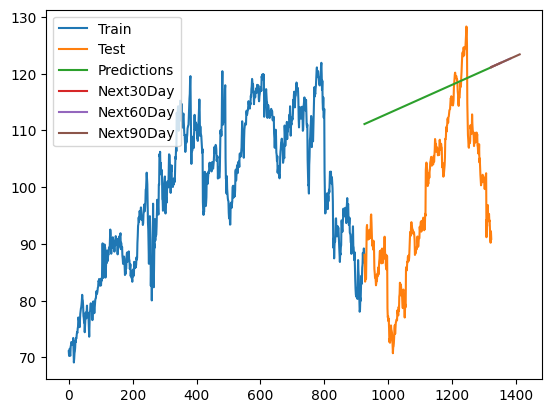

In [25]:
#Vẽ hình
plt.plot(train_akam_df.index, train_akam_df['close'])
plt.plot(test_akam_df.index, test_akam_df['close'])
plt.plot(test_akam_df.index, y_pred)
plt.plot(last_30_data,y_next_30_days)
plt.plot(last_60_data,y_next_60_days)
plt.plot(last_90_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()